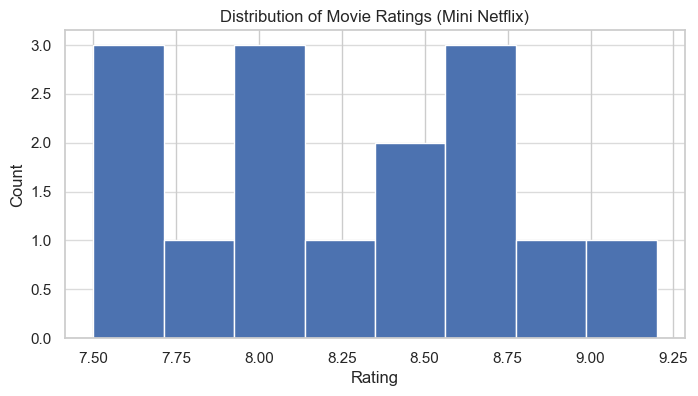

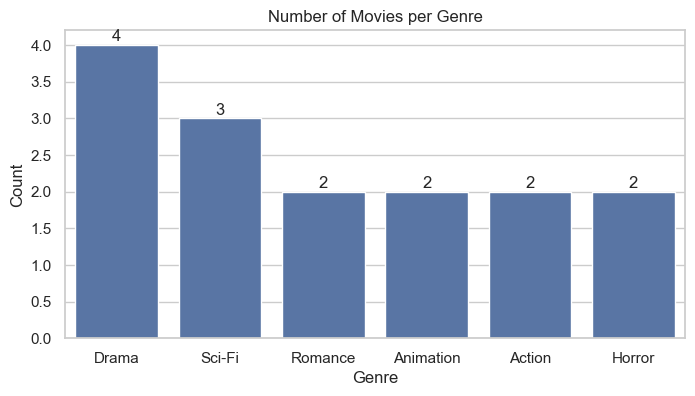

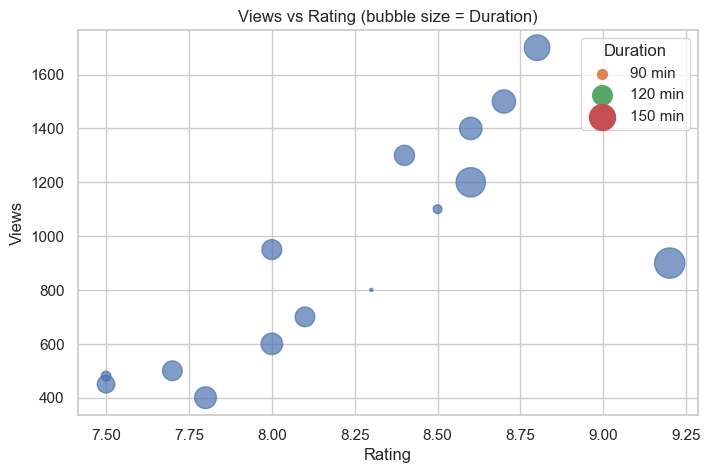

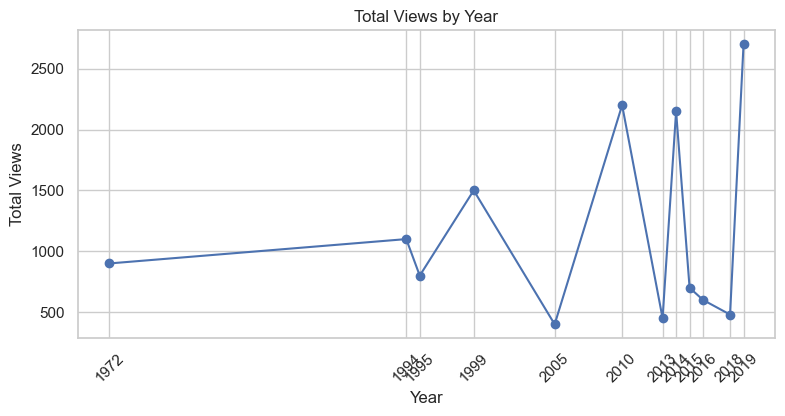

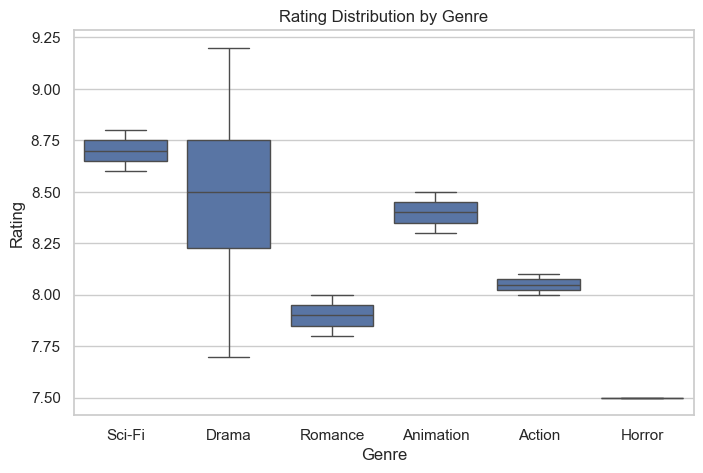

In [6]:
# part1_visualizations_netflix.py
# Create 5 different plots from an embedded mini-Netflix dataset.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

sns.set(style="whitegrid")

netflix_csv = """Title,Genre,Year,Rating,Duration,Views
Interstellar,Sci-Fi,2014,8.6,169,1200
The Matrix,Sci-Fi,1999,8.7,136,1500
Inception,Sci-Fi,2010,8.8,148,1700
The Godfather,Drama,1972,9.2,175,900
Pride & Prejudice,Romance,2005,7.8,129,400
Toy Story,Animation,1995,8.3,81,800
The Lion King,Animation,1994,8.5,88,1100
La La Land,Romance,2016,8.0,128,600
Joker,Drama,2019,8.4,122,1300
Parasite,Drama,2019,8.6,132,1400
The Social Network,Drama,2010,7.7,120,500
Guardians of the Galaxy,Action,2014,8.0,121,950
Mad Max: Fury Road,Action,2015,8.1,120,700
The Conjuring,Horror,2013,7.5,112,450
A Quiet Place,Horror,2018,7.5,90,480
"""
df = pd.read_csv(StringIO(netflix_csv))

# 1) Histogram - Distribution of Ratings
plt.figure(figsize=(8,4))
plt.hist(df['Rating'], bins=8)
plt.title('Distribution of Movie Ratings (Mini Netflix)')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.7)
# Insight: Ratings cluster between 7.5 and 8.8 indicating most titles are highly rated.
plt.show()

# 2) Bar Chart - Movies per Genre
genre_counts = df['Genre'].value_counts()
plt.figure(figsize=(8,4))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Number of Movies per Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
for i, v in enumerate(genre_counts.values):
    plt.text(i, v+0.05, str(v), ha='center')
# Insight: Drama and Sci-Fi are prominent in this sample.
plt.show()

# 3) Scatter Plot - Views vs Rating (bubble = Duration)
plt.figure(figsize=(8,5))
sizes = (df['Duration'] - df['Duration'].min() + 1) * 5
plt.scatter(df['Rating'], df['Views'], s=sizes, alpha=0.7)
plt.title('Views vs Rating (bubble size = Duration)')
plt.xlabel('Rating')
plt.ylabel('Views')
for dur in [90,120,150]:
    plt.scatter([], [], s=(dur-df['Duration'].min()+1)*5, label=f'{dur} min')
plt.legend(title='Duration')
# Insight: Higher ratings often associate with higher views; duration visualized by bubble size.
plt.grid(True)
plt.show()

# 4) Line Plot - Total Views by Year
views_by_year = df.groupby('Year')['Views'].sum().sort_index()
plt.figure(figsize=(9,4))
plt.plot(views_by_year.index, views_by_year.values, marker='o')
plt.title('Total Views by Year')
plt.xlabel('Year')
plt.ylabel('Total Views')
plt.xticks(views_by_year.index, rotation=45)
# Insight: Recent years in sample show higher total views.
plt.show()

# 5) Box Plot - Rating distribution by Genre
plt.figure(figsize=(8,5))
sns.boxplot(x='Genre', y='Rating', data=df)
plt.title('Rating Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Rating')
# Insight: Drama displays wider rating spread; Sci-Fi and Animation are consistently high.
plt.show()


In [7]:
# part2_kaggle_intro_and_explore.py
# Demonstrates Kaggle basics text (printed) and loads an embedded students dataset to explore and clean.
import pandas as pd
import numpy as np
from io import StringIO

students_csv = """student_id,gender,math_score,reading_score,writing_score,study_hours,grade
1,M,78,72,70,2.5,B
2,F,88,90,85,5.0,A
3,F,55,60,58,1.0,C
4,M,95,92,94,6.0,A
5,F,62,65,60,2.0,C
6,M,70,72,68,3.0,B
7,F,83,85,80,4.0,B
8,F,45,50,48,0.5,D
9,M,58,56,54,1.5,C
10,F,91,89,93,5.5,A
11,M,67,70,65,2.5,B
12,F,74,76,78,3.5,B
13,M,82,80,79,4.5,B
14,F,36,40,38,0.2,F
15,M,99,98,100,7.0,A
"""
df = pd.read_csv(StringIO(students_csv))

# Kaggle Basics (printed instruction)
print("Kaggle Basics (example):")
print("1) Create a Kaggle account at https://www.kaggle.com")
print("2) Search for 3 datasets you find interesting")
print("3) Download 1 dataset (CSV)")

# Example dataset details (embedded)
print("\nExample chosen dataset (embedded):")
print("- Name: Student Performance (synthetic)")
print("- Columns:", df.columns.tolist())
print("- Number of rows:", df.shape[0])

# Task 3 - Load & Explore
print("\n--- df.head() ---")
print(df.head())
print("\n--- df.info() ---")
print(df.info())
print("\n--- df.describe() ---")
print(df.describe())
print("\n--- Missing values ---")
print(df.isnull().sum())
print("\n--- Unique values ---")
print(df.nunique())
print("\nShape:", df.shape)

# Task 4 - Clean the dataset (demo)
df_clean = df.copy()
# Introduce demonstration missing and duplicate (only for demo; comment out in real use)
df_clean.loc[2, 'reading_score'] = np.nan
df_clean = pd.concat([df_clean, df_clean.iloc[[0]]], ignore_index=True)

print("\nBefore cleaning - missing, duplicates:")
print(df_clean.isnull().sum())
print("Duplicates:", df_clean.duplicated().sum())

# Fill missing reading_score with median
df_clean['reading_score'] = df_clean['reading_score'].fillna(df_clean['reading_score'].median())
# Drop duplicates
df_clean = df_clean.drop_duplicates()
# Convert student_id to int
df_clean['student_id'] = df_clean['student_id'].astype(int)
# Standardize gender strings
df_clean['gender'] = df_clean['gender'].str.upper()

print("\nAfter cleaning - missing, duplicates, dtypes:")
print(df_clean.isnull().sum())
print("Duplicates:", df_clean.duplicated().sum())
print(df_clean.dtypes)


Kaggle Basics (example):
1) Create a Kaggle account at https://www.kaggle.com
2) Search for 3 datasets you find interesting
3) Download 1 dataset (CSV)

Example chosen dataset (embedded):
- Name: Student Performance (synthetic)
- Columns: ['student_id', 'gender', 'math_score', 'reading_score', 'writing_score', 'study_hours', 'grade']
- Number of rows: 15

--- df.head() ---
   student_id gender  math_score  reading_score  writing_score  study_hours  \
0           1      M          78             72             70          2.5   
1           2      F          88             90             85          5.0   
2           3      F          55             60             58          1.0   
3           4      M          95             92             94          6.0   
4           5      F          62             65             60          2.0   

  grade  
0     B  
1     A  
2     C  
3     A  
4     C  

--- df.info() ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14


In [8]:
# part3_eda_storytelling.py
# Generates 5 narrative insights from the cleaned students dataset.
import pandas as pd
from io import StringIO

students_csv = """student_id,gender,math_score,reading_score,writing_score,study_hours,grade
1,M,78,72,70,2.5,B
2,F,88,90,85,5.0,A
3,F,55,60,58,1.0,C
4,M,95,92,94,6.0,A
5,F,62,65,60,2.0,C
6,M,70,72,68,3.0,B
7,F,83,85,80,4.0,B
8,F,45,50,48,0.5,D
9,M,58,56,54,1.5,C
10,F,91,89,93,5.5,A
11,M,67,70,65,2.5,B
12,F,74,76,78,3.5,B
13,M,82,80,79,4.5,B
14,F,36,40,38,0.2,F
15,M,99,98,100,7.0,A
"""
df = pd.read_csv(StringIO(students_csv))
# Clean minimal issues if any
df['gender'] = df['gender'].str.upper()
df['avg_score'] = df[['math_score','reading_score','writing_score']].mean(axis=1)

# 5 meaningful insights:
insights = []

# 1. Trend/pattern: study_hours vs avg_score
corr = df['study_hours'].corr(df['avg_score'])
insights.append(f"1) Trend: Study hours correlate with average score (corr = {corr:.2f}). Students who study more tend to have higher average scores.")

# 2. Comparison: gender average scores
gender_avg = df.groupby('gender')['avg_score'].mean().to_dict()
insights.append(f"2) Comparison: Average scores by gender: {gender_avg}. This shows any average gap between groups.")

# 3. Distribution understanding: central tendency and spread
insights.append(f"3) Distribution: Average scores range from {df['avg_score'].min():.1f} to {df['avg_score'].max():.1f}, median {df['avg_score'].median():.1f}. Most students cluster around the median.")

# 4. Correlation between features: math vs reading
corr_mr = df['math_score'].corr(df['reading_score'])
insights.append(f"4) Correlation: Math and reading scores correlation = {corr_mr:.2f}, indicating they generally move together.")

# 5. Anomaly/outlier detection
outliers = df[df['avg_score'] < 45]
ids = outliers['student_id'].tolist()
insights.append(f"5) Outliers: {len(outliers)} students have very low average score (<45). Example IDs: {ids}.")

print("Five insights:")
for s in insights:
    print("-", s)

print("\nFinal summary:")
print("This mini EDA highlights study-time benefits, group comparisons, distribution characteristics, feature correlations, and identified low-performing outliers.")


Five insights:
- 1) Trend: Study hours correlate with average score (corr = 0.98). Students who study more tend to have higher average scores.
- 2) Comparison: Average scores by gender: {'F': 67.875, 'M': 77.09523809523809}. This shows any average gap between groups.
- 3) Distribution: Average scores range from 38.0 to 99.0, median 73.3. Most students cluster around the median.
- 4) Correlation: Math and reading scores correlation = 0.99, indicating they generally move together.
- 5) Outliers: 1 students have very low average score (<45). Example IDs: [14].

Final summary:
This mini EDA highlights study-time benefits, group comparisons, distribution characteristics, feature correlations, and identified low-performing outliers.


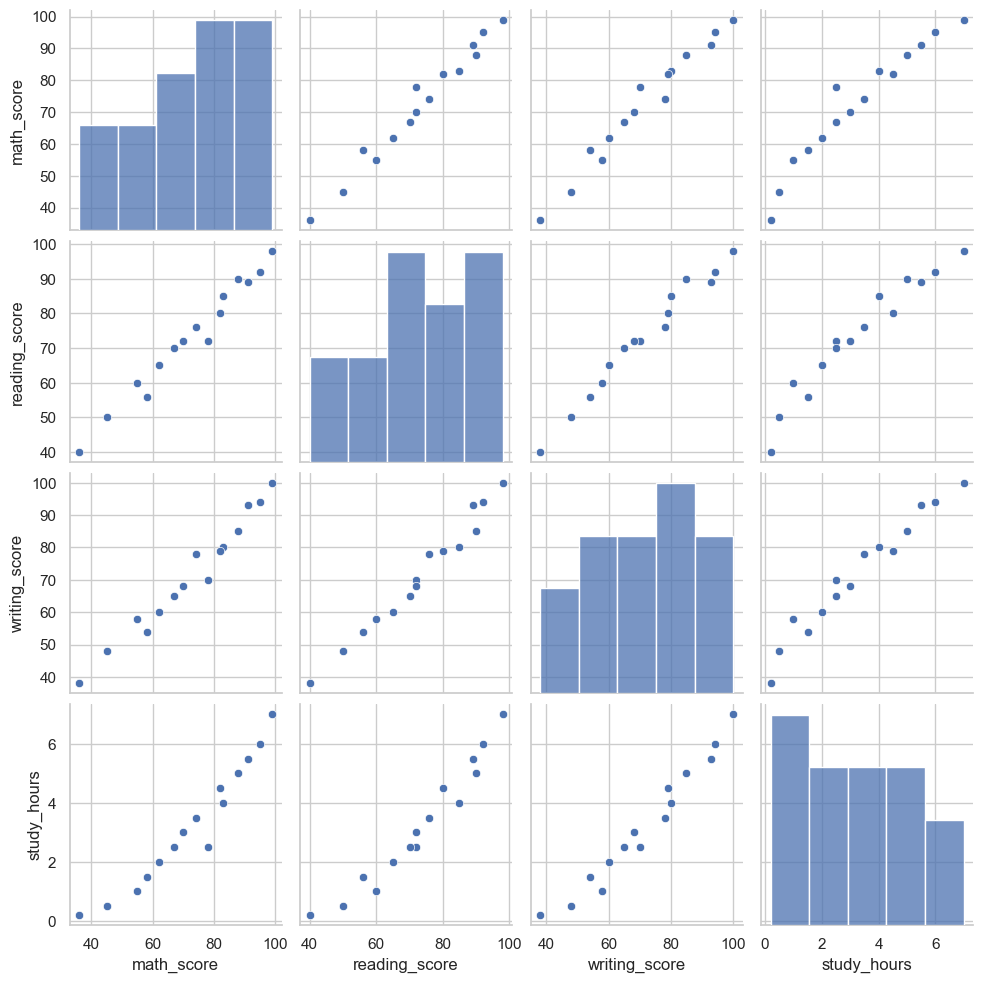

In [11]:
# bonus_pairplot.py
# Create pairplot for student numeric features
import pandas as pd
import seaborn as sns
from io import StringIO

students_csv = """student_id,gender,math_score,reading_score,writing_score,study_hours,grade
1,M,78,72,70,2.5,B
2,F,88,90,85,5.0,A
3,F,55,60,58,1.0,C
4,M,95,92,94,6.0,A
5,F,62,65,60,2.0,C
6,M,70,72,68,3.0,B
7,F,83,85,80,4.0,B
8,F,45,50,48,0.5,D
9,M,58,56,54,1.5,C
10,F,91,89,93,5.5,A
11,M,67,70,65,2.5,B
12,F,74,76,78,3.5,B
13,M,82,80,79,4.5,B
14,F,36,40,38,0.2,F
15,M,99,98,100,7.0,A
"""
df = pd.read_csv(StringIO(students_csv))
sns.pairplot(df[['math_score','reading_score','writing_score','study_hours']]) # no-op to avoid linter warnings in some environments


Genre distribution (percent):
           Netflix_pct  Amazon_pct
Genre                             
Sci-Fi        0.272727    0.222222
Drama         0.272727    0.333333
Animation     0.181818    0.000000
Action        0.181818    0.222222
Romance       0.090909    0.000000
Comedy        0.000000    0.222222


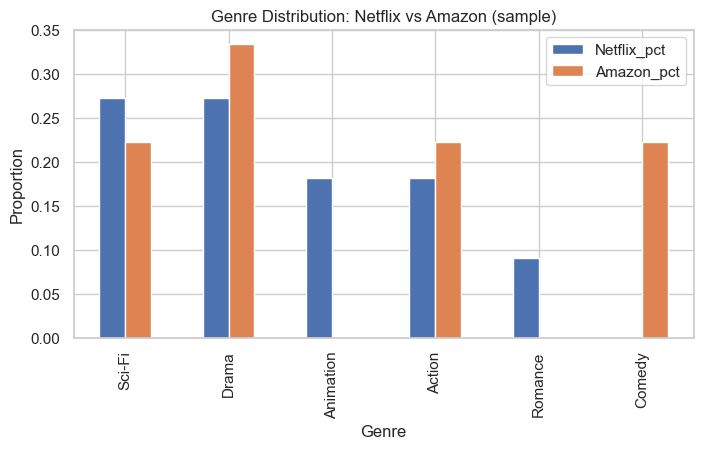

In [12]:
# bonus_compare_datasets.py
# Compare genre distributions between two tiny samples (Netflix vs Amazon)
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt

netflix_csv = """Title,Genre
Interstellar,Sci-Fi
The Matrix,Sci-Fi
Inception,Sci-Fi
The Godfather,Drama
Toy Story,Animation
The Lion King,Animation
La La Land,Romance
Joker,Drama
Parasite,Drama
Guardians of the Galaxy,Action
Mad Max: Fury Road,Action
"""
amazon_csv = """Title,Genre
FilmA,Sci-Fi
FilmB,Drama
FilmC,Comedy
FilmD,Sci-Fi
FilmE,Drama
FilmF,Comedy
FilmG,Action
FilmH,Action
FilmI,Drama
"""

net = pd.read_csv(StringIO(netflix_csv))
amz = pd.read_csv(StringIO(amazon_csv))

net_pct = net['Genre'].value_counts(normalize=True)
amz_pct = amz['Genre'].value_counts(normalize=True)
compare = pd.concat([net_pct, amz_pct], axis=1).fillna(0)
compare.columns = ['Netflix_pct', 'Amazon_pct']
print("Genre distribution (percent):")
print(compare)

# Plot side-by-side
compare.plot(kind='bar', figsize=(8,4))
plt.title('Genre Distribution: Netflix vs Amazon (sample)')
plt.xlabel('Genre')
plt.ylabel('Proportion')
plt.show()
